# 🧠 Customer Churn Prediction — Project Notebook

**Goal:** Build a complete machine learning pipeline to predict customer churn. Includes data loading, EDA, preprocessing, model training, and evaluation.

## 1️⃣ Setup & Imports

In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap joblib ipywidgets --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib, os

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


## 2️⃣ Load or Generate Dataset

In [5]:
os.makedirs('data', exist_ok=True)
DATA_PATH = 'data/telco_churn.csv'

if not os.path.exists(DATA_PATH):
    np.random.seed(42)
    n = 1500
    df = pd.DataFrame({
        'customerID': [f'CUST{i}' for i in range(n)],
        'tenure': np.random.randint(0, 72, n),
        'MonthlyCharges': np.random.uniform(20, 120, n).round(2),
        'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n, p=[0.6, 0.2, 0.2]),
        'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], n),
        'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n, p=[0.4, 0.45, 0.15]),
        'Gender': np.random.choice(['Male', 'Female'], n),
        'SeniorCitizen': np.random.choice([0,1], n, p=[0.85,0.15]),
        'Churn': np.random.choice(['Yes','No'], n, p=[0.26,0.74])
    })
    df.to_csv(DATA_PATH, index=False)
    print("✅ Synthetic dataset created:", DATA_PATH)
else:
    df = pd.read_csv(DATA_PATH)
    print("✅ Dataset loaded:", DATA_PATH)

df.head()


✅ Dataset loaded: data/telco_churn.csv


,customerID,tenure,MonthlyCharges,Contract,PaymentMethod,InternetService,Gender,SeniorCitizen,Churn
0,CUST0,51,107.18,One year,Electronic check,Fiber optic,Female,0,Yes
1,CUST1,14,41.92,Month-to-month,Mailed check,DSL,Female,0,Yes
2,CUST2,71,117.59,Month-to-month,Electronic check,No,Female,0,No
3,CUST3,60,53.69,Two year,Mailed check,Fiber optic,Male,0,No
4,CUST4,20,38.21,One year,Electronic check,Fiber optic,Male,0,No


## 3️⃣ Quick EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       1500 non-null   object 
 1   tenure           1500 non-null   int64  
 2   MonthlyCharges   1500 non-null   float64
 3   Contract         1500 non-null   object 
 4   PaymentMethod    1500 non-null   object 
 5   InternetService  1500 non-null   object 
 6   Gender           1500 non-null   object 
 7   SeniorCitizen    1500 non-null   int64  
 8   Churn            1500 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 105.6+ KB
None
            tenure  MonthlyCharges  SeniorCitizen
count  1500.000000     1500.000000    1500.000000
mean     34.870667       70.065560       0.131333
std      20.857228       28.927309       0.337877
min       0.000000       20.010000       0.000000
25%      16.000000       45.605000       0.000000
50%      35.000000 

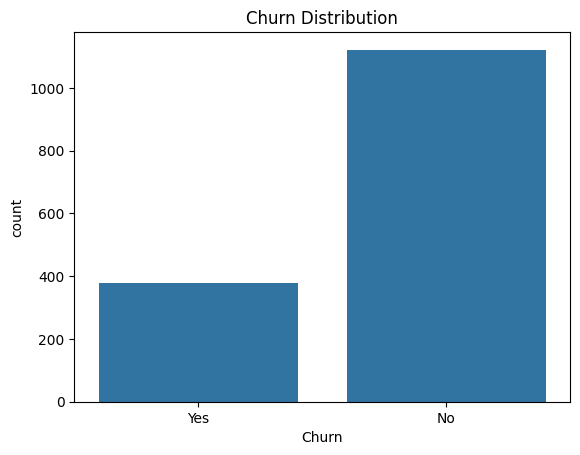

In [10]:
print(df.info())
print(df.describe())
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()


## 4️⃣ Data Preprocessing

In [11]:
df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col != 'customerID':
        df[col] = le.fit_transform(df[col])

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']
print('✅ Preprocessing complete. Shape:', X.shape)


✅ Preprocessing complete. Shape: (1500, 8)


## 5️⃣ Model Training & Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    probs = model.predict_proba(X_test)[:,1]
    print(f"\n🔹 {name}")
    print(classification_report(y_test, preds))
    print("ROC AUC:", roc_auc_score(y_test, probs))


C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1


🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       281
           1       0.00      0.00      0.00        94

    accuracy                           0.75       375
   macro avg       0.37      0.50      0.43       375
weighted avg       0.56      0.75      0.64       375

ROC AUC: 0.47743620807147724

🔹 Random Forest
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       281
           1       0.24      0.06      0.10        94

    accuracy                           0.71       375
   macro avg       0.49      0.50      0.47       375
weighted avg       0.62      0.71      0.65       375

ROC AUC: 0.4794616491254638

🔹 XGBoost
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       281
           1       0.35      0.19      0.25        94

    accuracy                           0.71       375
   macro avg       0

C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [02:51:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 6️⃣ Feature Importance (Random Forest)

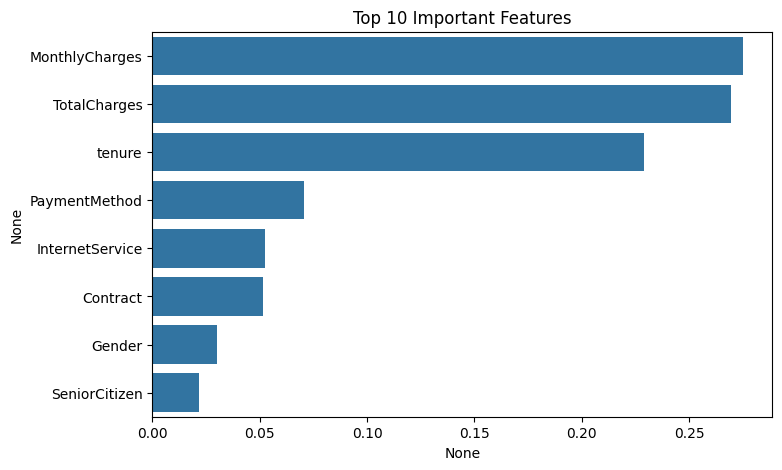

In [13]:
rf = models['Random Forest']
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()


## 7️⃣ Save Model & Sample Predictions

In [ ]:
os.makedirs('models', exist_ok=True)
model_path = 'models/rf_churn_model.pkl'
joblib.dump(rf, model_path)
print("✅ Model saved to", model_path)

sample = X_test.sample(5, random_state=1)
print("Sample Predictions:")
print(rf.predict(sample))


## ✅ Done!
You can now extend this notebook by adding SHAP explainability or a FastAPI deployment later.